# **Task #1 - Prediction using Supervised ML**
### Data Science and Business Analytics Intern @ The Sparks Foundation - GRIP

---
<br>

### **Problem Statement:**  
- Predict the percentage of a student based on the number of study hours.
- What will be predicted score if a student studies for 9.25 hrs/day?

### **Dataset:**
* #### http://bit.ly/w-data

### **Details:**
- This is a simple linear regression task as it involves just 2 variables.
- Supervised ML learning is the types of machine learning in which machines are trained using well "labelled" training data, and on basis of that data, machines predict the output. The labelled data means some input data is already tagged with the correct output.

- Linear regression is a type of statistical analysis used to predict the relationship between two variables. It assumes a linear relationship between the independent variable and the dependent variable, and aims to find the best-fitting line that describes the relationship.



## `Author: J VENKATA LAKSHMI SAI ROHITH`

## **Import Library**

In [3]:
# For Data analysis, manipulation, and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For Training/testing, selecting a model, and Evaluating a model performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For Save/Load Model
import pickle

## **Load Dataset**

In [4]:
# Load and Read Data
df = pd.read_csv("http://bit.ly/w-data")
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## **Analysis of Data**

In [6]:
# Information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# It gives the Dimension or The number of Rows and columns
df.shape

(25, 2)

In [8]:
# Descriptive statistics summary of a given dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# Check the null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## **Data Visualization**

Text(0.5, 1.0, 'Hours VS Score')

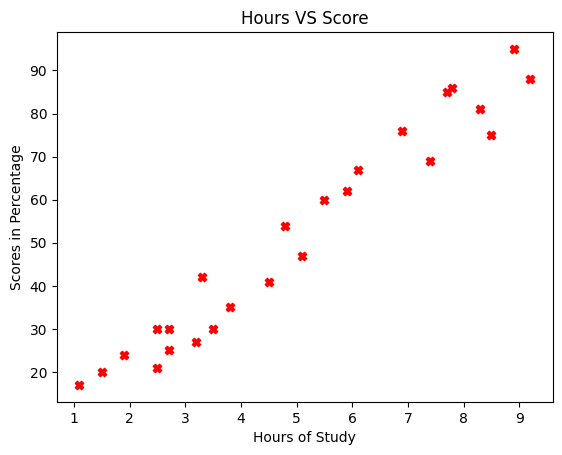

In [10]:
# Visualize the data using a scatter plot.
plt.scatter(df.Hours,df.Scores, marker="X", color="r")
plt.xlabel("Hours of Study")
plt.ylabel("Scores in Percentage")
plt.title("Hours VS Score")

## **Spliting the Data into Train and Test**

In [11]:
# X = df.iloc[:, :-1].values
# y = df.iloc[:, 1].values

X = df[['Hours']]
y = df[['Scores']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [12]:
# to check how much data split into training and testing
print(X.shape,X_train.shape,X_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(25, 1) (20, 1) (5, 1)
(25, 1) (20, 1) (5, 1)


## **Train the Model**

In [13]:
# Train the model using a LinearRegression algorithm
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

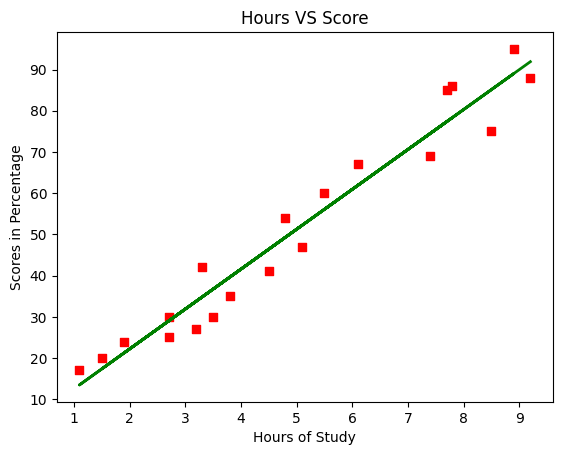

In [14]:
# Calculate Line with training data.
line = model.coef_*X_train + model.intercept_

# Best-fit line for training data.
plt.scatter(X_train,y_train, marker=",", color="red")
plt.plot(X_train,line, color="green", linestyle="-", linewidth=2)
plt.xlabel("Hours of Study")
plt.ylabel("Scores in Percentage")
plt.title("Hours VS Score")
plt.show()

## **Predict The Model**

In [15]:
# Predict model on Test data
pred = model.predict(X_test)
print("Predicted Scores: \n",pred)

Predicted Scores: 
 [[83.18814104]
 [27.03208774]
 [27.03208774]
 [69.63323162]
 [59.95115347]]


In [16]:
# Predict score for 9.25 hours
predict_hour = 9.25
pred_value = model.predict(np.array([[predict_hour]]))
print("Predicted score for",predict_hour,"hour of study is:",pred_value[0][0])

Predicted score for 9.25 hour of study is: 92.38611528261494


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **Evaluating the Model**

In [17]:
# Evaluate a model using MAE, MSE and R2 Score

print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print("R2_Score: ",r2_score(pred, y_test))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
R2_Score:  0.9633493914970949


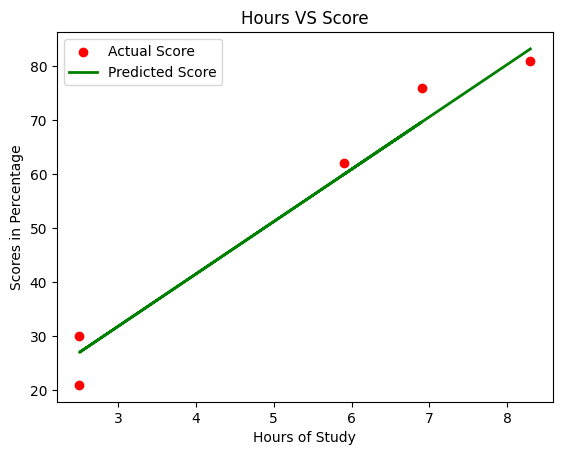

In [18]:
plt.scatter(X_test,y_test, marker="o", color="red", label="Actual Score")
plt.plot(X_test, pred, color="green",  linewidth=2, label="Predicted Score")
plt.xlabel("Hours of Study")
plt.ylabel("Scores in Percentage")
plt.title("Hours VS Score")
plt.legend()
plt.show()

## **Save Model in Pickle File**

In [19]:
f1 = "stu_percentage.pkl"
pickle.dump(model,open(f1,'wb'))